# Loan Prediction - Dream Housing Finance Company

## Index

1. [Data Exploration](#Data_Exploration)  
    1.1 [Distribution Analysis](#Distribution_Analysis)  
    1.2 [Categorical Variable Analysis](#Categorical_Variable_Analysis)  
  
2. [Data Munging](#Data_Munging)  
    2.1 [Missing Values](#Missing_Values)  
    2.2 [Extreme Values](#Extreme_Values)  
  
3. [Data Modelling](#Data_Modelling)  
    3.1 [Label Encoding](#Label_Encoding)  
    3.2 [Generic Function](#Generic_Function)  
    3.3 [Logistic Regression](#Logistic_Regression)  
    3.4 [Decision Tree](#Decision_Tree)  
    3.5 [Random Forest](#Random_Forest)  
      
4. [Conclusion](#Conclusion)  

## About Company

Dream Housing Finance company deals in all home loans. They have presence across all urban, semi urban and rural areas. Customer first apply for home loan after that company validates the customer eligibility for loan.

## Problem

Company wants to automate the loan eligibility process (real time) based on customer detail provided while filling online application form. These details are Gender, Marital Status, Education, Number of Dependents, Income, Loan Amount, Credit History and others. To automate this process, they have given a problem to identify the customers segments, those are eligible for loan amount so that they can specifically target these customers. Here they have provided a partial data set.

## Data

**Variable** ---------- Description  
**Loan_ID** ----------- Unique Loan ID  
**Gender** ------------ Male/ Female  
**Married** ----------- Applicant married (Y/N)  
**Dependents** -------- Number of dependents  
**Education** --------- Applicant Education (Graduate/ Under Graduate)  
**Self_Employed** ----- Self employed (Y/N)  
**ApplicantIncome** --- Applicant income  
**CoapplicantIncome** - Coapplicant income  
**LoanAmount** -------- Loan amount in thousands  
**Loan_Amount_Term** -- Term of loan in months  
**Credit_History** ---- credit history meets guidelines  
**Property_Area** ----- Urban/ Semi Urban/ Rural  
**Loan_Status** ------- Loan approved (Y/N)  

In [143]:
# Importing Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Libraries for Modelling

from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn import metrics

# Removing Warnings

import warnings
warnings.filterwarnings("ignore")

In [3]:
# Reading the data into a dataframe

df=pd.read_csv('Train.csv')

<a id='Data_Exploration'></a>
## 1. Data Exploration

In [3]:
df.head(10)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
6,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y
7,LP001014,Male,Yes,3+,Graduate,No,3036,2504.0,158.0,360.0,0.0,Semiurban,N
8,LP001018,Male,Yes,2,Graduate,No,4006,1526.0,168.0,360.0,1.0,Urban,Y
9,LP001020,Male,Yes,1,Graduate,No,12841,10968.0,349.0,360.0,1.0,Semiurban,N


In [4]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


### Inferences from describe() function:

1. **22** missing values for **LoanAmount**.
2. **14** missing values for **Loan_Amount_Term**.
3. **50** missing values for **Credit_History**
4. **84%** people have **Credit_History**


<a id='Distribution_Analysis'></a>
## 1.1 Distribution Analysis 

### 1.1.1 Analysis of Applicant Income

Text(0.5, 0, 'Applicant Income')

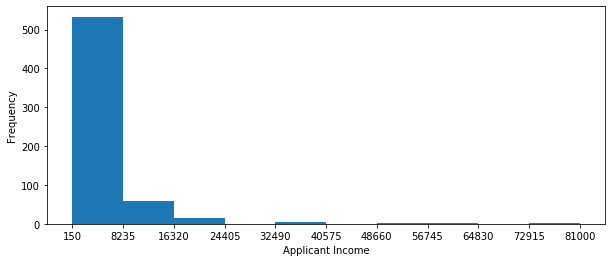

In [36]:
# Histogram for Applicant Income

count,bin_edges=np.histogram(df['ApplicantIncome'])
df['ApplicantIncome'].plot(kind='hist',xticks=bin_edges,figsize=(10,4))
plt.xlabel("Applicant Income")

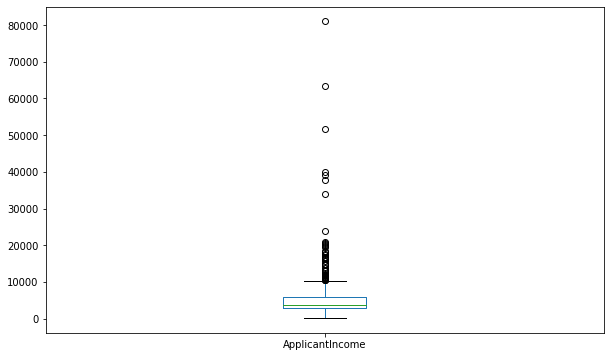

In [38]:
# Boxplot for Applicant Income

df['ApplicantIncome'].plot(kind='box',figsize=(10,6))

### Inferences from Applicant Income

- We find too many outliers in ApplicantIncome.
- This can be due to the income disparity in the society.
- Part of this fact can be driven by Education.

Thus, we check ApplicantIncome by education.

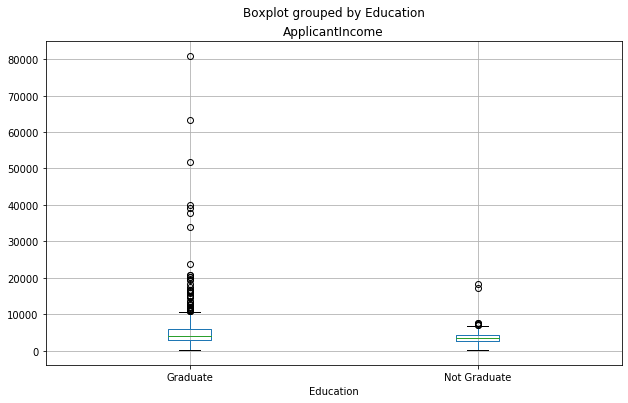

In [39]:
# Boxplot of Applicant Income by Education

df.boxplot(column='ApplicantIncome',by='Education',figsize=(10,6))

- We can see that there is no substantial difference between the mean income of graduate and non-graduates. 
- But there are a higher number of graduates with very high incomes, which are appearing to be the outliers

### 1.1.2 Analysis of Loan Amount

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x04364C30>]],
      dtype=object)

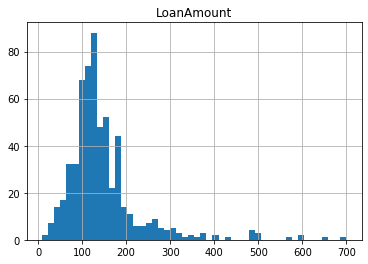

In [43]:
# Histogram for Loan Amount

df.hist(column='LoanAmount',bins=50)

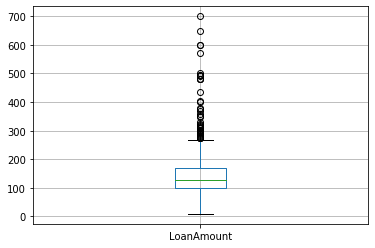

In [44]:
# Boxplot for Loan Amount

df.boxplot(column='LoanAmount')

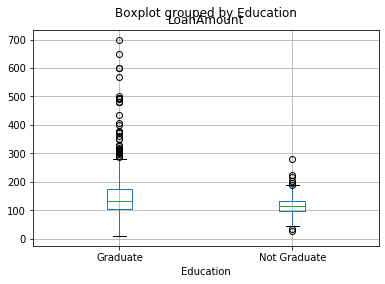

In [46]:
# Boxplot of Loan Amount by Education

df.boxplot(column='LoanAmount',by='Education')

### Inferences from Loan Amount

- Most of the loan amount lies between 100 to 150.
- Loan Amount has many outliers.

### 1.1.3 Analysis of Co Applicant Income

Text(0.5, 0, 'Co-Applicant Income')

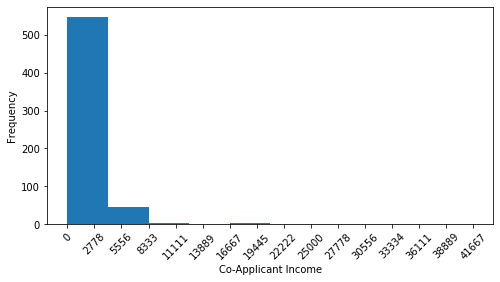

In [135]:
# Histogram for Co Applicant Income

count,bin_edges=np.histogram(df['CoapplicantIncome'],15)
df['CoapplicantIncome'].plot(kind='hist',xticks=bin_edges,figsize=(8,4),rot=45)
plt.xlabel("Co-Applicant Income")

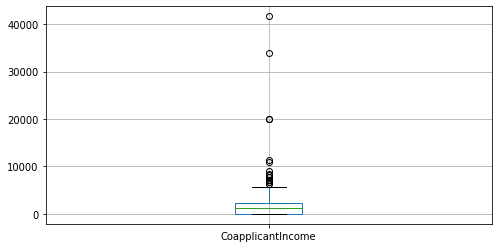

In [133]:
# Boxplot for Co-Applicant Income

df.boxplot(column='CoapplicantIncome',figsize=(8,4))

In [ ]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


<a id='Categorical_Variable_Analysis'></a>
## 1.2 Categorical Variable Analysis

In [70]:
# Displaying Value Counts and making Pivot Table

temp1 = df['Credit_History'].value_counts(ascending=True)
temp2 = df.pivot_table(values='Loan_Status',index=['Credit_History'],aggfunc = lambda x: x.map({'Y':1,'N':0}).mean())

print("Frequency Table for Credit History")
print(temp1)

print("\nProbability of getting Loan for each Credit History Class")
print(temp2)

Frequency Table for Credit History
0.0     89
1.0    475
Name: Credit_History, dtype: int64

Probability of getting Loan for each Credit History Class
                Loan_Status
Credit_History             
0.0                0.078652
1.0                0.795789


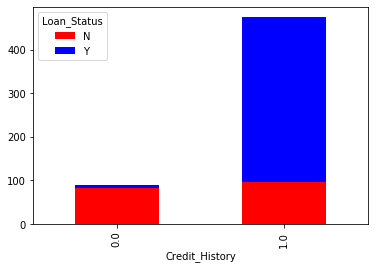

In [95]:
# Plotting a stacked plot

temp = pd.crosstab(df['Credit_History'],df['Loan_Status'])
temp.plot(kind = 'bar',stacked=True,color=['red','blue'],grid=False)

## Inference

- We conclude that most people without Credit History were rejected in the Loan Status.

<a id='Data_Munging'></a>
## 2. Data Munging

In [4]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


<a id='Missing_Values'></a>
### 2.1 Missing Values

In [96]:
df.apply(lambda x : sum(x.isnull()),axis=0)

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

### Missing Values for Loan Amount and Self Employed

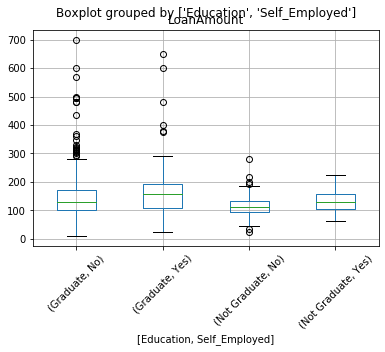

In [12]:
df.boxplot(column=['LoanAmount'],by=['Education','Self_Employed'],rot=45)

- Thus, we can infer from this boxplot that Education and Self_Employed can combine to give a good estimation of Loan Amount. 
- For this we have to ensure that Education and Self_Employed have no missing values.

In [14]:
# Filling missing values of Education

df['Self_Employed'].value_counts()

No     500
Yes     82
Name: Self_Employed, dtype: int64

- Since ~86% Values of Self_Employed are 'No', we can impute the missing values as 'No' as there is high probability of success.

In [28]:
# Filling missing values in Self_Employed with 'No'

df['Self_Employed'].fillna('No',inplace=True)
df['Self_Employed'].isnull().sum()

0

In [36]:
# Pivot table is created, which provides us median values for all the groups of unique values of Self_Employed and Education 
# features.

table = df.pivot_table(values='LoanAmount', index='Self_Employed', columns='Education',aggfunc=np.median)    
print(table)

Education      Graduate  Not Graduate
Self_Employed                        
No                130.0         113.0
Yes               157.5         130.0


In [53]:
# We define a function, which returns the values of these cells and apply it to fill the missing values of loan amount.

def fage(x):
    return table.loc[x['Self_Employed'],x['Education']]

df['LoanAmount'].fillna(df[df['LoanAmount'].isnull()].apply(fage, axis=1), inplace=True)

In [55]:
df['LoanAmount'].isnull().sum()

0

### Missing Values for Gender

In [56]:
df['Gender'].value_counts()

Male      489
Female    112
Name: Gender, dtype: int64

- Since nearly 82% of the Gender is Male, we replace the missing values with Male.

In [63]:
df['Gender'].fillna("Male",inplace=True)

df['Gender'].isnull().sum()

0

In [123]:
# OR df['Gender'].fillna(df['Gender'].mode()[0], inplace=True), we have written '[0]' because there can be more than one value 
#that has a hisg number. Thus, [0] selects the first value.

### Missing Values for Married

In [64]:
df['Married'].value_counts()

Yes    398
No     213
Name: Married, dtype: int64

- Since Married has only 3 missing values, we remove the rows with missing values.

In [86]:
df.dropna(subset=['Married'],axis=0,inplace=True)

In [ ]:
# OR df['Married'].fillna(df['Married'].mode()[0], inplace=True)

### Missing Values for Dependents

In [75]:
df['Dependents'].value_counts()

0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64

In [87]:
df.dropna(axis=0,subset=['Dependents'],inplace=True)
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,599.000000,599.000000,599.000000,586.000000,549.000000
mean,5408.864775,1634.896361,146.194491,341.672355,0.846995
std,6168.473138,2953.144575,84.994630,64.874910,0.360321
min,150.000000,0.000000,9.000000,12.000000,0.000000
25%,2853.000000,0.000000,100.000000,360.000000,1.000000
50%,3775.000000,1213.000000,128.000000,360.000000,1.000000
75%,5816.500000,2304.000000,165.500000,360.000000,1.000000
max,81000.000000,41667.000000,700.000000,480.000000,1.000000


In [ ]:
# OR df['Dependents'].fillna(df['Dependents'].mode()[0], inplace=True)

### Missing Values for Loan Amount Term

In [101]:
df['Loan_Amount_Term'].value_counts()

360.0    502
180.0     43
480.0     13
300.0     13
84.0       4
240.0      3
120.0      3
36.0       2
60.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64

- Since, ~86% of the Loan Amount Term is '360.0',we replace missing values with '360.0'

In [103]:
df['Loan_Amount_Term'].fillna(360.0,inplace=True)
df['Loan_Amount_Term'].isnull().sum()

0

In [ ]:
# OR df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mode()[0], inplace=True)

### Missing Values for Credit History

In [104]:
df['Credit_History'].value_counts()

1.0    465
0.0     84
Name: Credit_History, dtype: int64

- Since, ~85% of Credit History is '1', we replace missing values with '1' 

In [106]:
df['Credit_History'].fillna(1.0,inplace=True)
df['Credit_History'].isnull().sum()

0

In [ ]:
# OR df['Credit_History'].fillna(df['Credit_History'].mode()[0], inplace=True)

- Thus, all missing values have been imputed.

In [107]:
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

<a id='Extreme_Values'></a>
### 2.2 Extreme Values

- Since the extreme values are practically possible, i.e. some people might apply for high value loans due to specific needs. So instead of treating them as outliers, we apply log transformation to nullify their effect

Text(0.5, 1.0, 'Loan Amount Log')

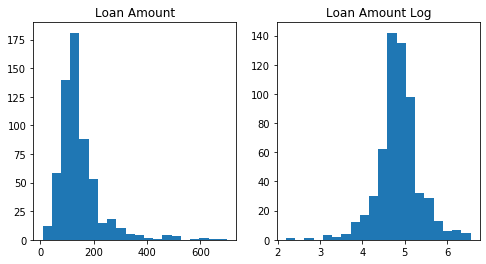

In [122]:
# Applying log Transform on Loan Amount
df['LoanAmount_log']=np.log(df['LoanAmount'])

# Making Subplots
fig=plt.figure()

# Subplot 1
ax1=fig.add_subplot(121)
df['LoanAmount'].hist(bins=20,figsize=(8,4),grid=False)
ax1.set_title("Loan Amount")

# Subplot 2
ax2=fig.add_subplot(122)
df['LoanAmount_log'].hist(bins=20,figsize=(8,4),grid=False)
ax2.set_title("Loan Amount Log")

-  One intuition can be that some applicants have lower income but strong support Co-applicants. So it might be a good idea to combine both incomes as total income and take a log transformation of the same.

Text(0.5, 1.0, 'Total Income Log')

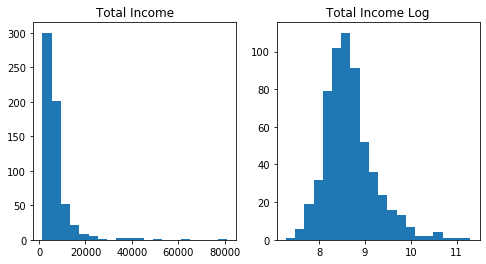

In [121]:
# Making Total Income Column
df['TotalIncome']=df['ApplicantIncome']+df['CoapplicantIncome']

# Applying Log Transform
df['TotalIncome_log']=np.log(df['TotalIncome'])

# Forming Subplots
fig=plt.figure()

# Subplot 1
ax1=fig.add_subplot(121)   
df['TotalIncome'].hist(bins=20,figsize=(8,4),grid=False)
ax1.set_title("Total Income")

# Subplot 2
ax2=fig.add_subplot(122)
df['TotalIncome_log'].hist(bins=20,figsize=(8,4),grid=False)
ax2.set_title("Total Income Log")

<a id='Data_Modelling'></a>
## 3. Data Modelling

In [124]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,LoanAmount_log,TotalIncome,TotalIncome_log
0,LP001002,Male,No,0,Graduate,No,5849,0.0,130.0,360.0,1.0,Urban,Y,4.867534,5849.0,8.674026
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,4.852030,6091.0,8.714568
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,4.189655,3000.0,8.006368
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,4.787492,4941.0,8.505323
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y,4.948760,6000.0,8.699515


<a id='Label_Encoding'></a>
### 3.1 Label Encoding

In [125]:
var=['Gender','Married','Dependents','Education','Self_Employed','Property_Area','Loan_Status']
le=LabelEncoder()

for i in var:
    df[i]=le.fit_transform(df[i])

df.dtypes

Loan_ID               object
Gender                 int32
Married                int32
Dependents             int32
Education              int32
Self_Employed          int32
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area          int32
Loan_Status            int32
LoanAmount_log       float64
TotalIncome          float64
TotalIncome_log      float64
dtype: object

<a id='Generic_Function'></a>
### 3.2 Generic Function

Generic Function for making a classification model and accessing performance 

In [153]:
def classification_model(model,data,predictors,outcome):
    
    #Fit the model
    model.fit(data[predictors],data[outcome])
    
    #Making Predictions on Training Set
    predictions=model.predict(data[predictors])
    
    #Printing Model Accuracy
    accuracy = metrics.accuracy_score(predictions,data[outcome])
    print("Accuracy : %s" % "{0:.3%}".format(accuracy))
    
    #Perform K-Fold cross validation with 5 folds
    kf = KFold(n_splits=5)
    error = []
    
    for train,test in kf.split(data[predictors]):
        
        #Filter Training Data
        train_predictors = (data[predictors].iloc[train,:])
    
        # The target we are using to train the algorithm.
        train_target = data[outcome].iloc[train]
    
        # Training the algorithm using the predictors and target.
        model.fit(train_predictors, train_target)
    
        #Record error from each cross-validation run
        error.append(model.score(data[predictors].iloc[test,:], data[outcome].iloc[test]))
 
    print ("Cross-Validation Score : %s" % "{0:.3%}".format(np.mean(error)))

    #Fit the model again so that it can be refered outside the function:
    model.fit(data[predictors],data[outcome]) 

<a id='Logistic_Regression'></a>
### Logistic Regression

In [154]:
# Logistic Regression

outcome_var = 'Loan_Status'
model = LogisticRegression()
predictor_var = ['Credit_History','Education','Married','Self_Employed','Property_Area']
classification_model(model, df,predictor_var,outcome_var)

Accuracy : 80.634%
Cross-Validation Score : 80.636%


<a id='Decision_Tree'></a>
### Decision Tree

In [155]:
model = DecisionTreeClassifier()
predictor_var = ['Credit_History','Gender','Married','Education']
classification_model(model, df,predictor_var,outcome_var)

Accuracy : 80.634%
Cross-Validation Score : 80.636%


In [156]:
#Different combination of variables:

predictor_var = ['Credit_History','Loan_Amount_Term','LoanAmount_log']
classification_model(model, df,predictor_var,outcome_var)

Accuracy : 88.815%
Cross-Validation Score : 69.441%


<a id='Random_Forest'></a>
### Random Forest

In [161]:
model = RandomForestClassifier(n_estimators=100)
predictor_var = ['Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'Loan_Amount_Term', 'Credit_History', 'Property_Area',
        'LoanAmount_log','TotalIncome_log']
classification_model(model, df,predictor_var,outcome_var)

Accuracy : 100.000%
Cross-Validation Score : 76.966%


- Thus, 100% Accuracy indicates Model Overfitting.
- To resolve this we reduce the number of features based on the feature importance matrix.

In [158]:
#Creating a series with feature importances

featimp = pd.Series(model.feature_importances_, index=predictor_var).sort_values(ascending=False)
print (featimp)

TotalIncome_log     0.269117
Credit_History      0.262475
LoanAmount_log      0.227819
Property_Area       0.053101
Dependents          0.052619
Loan_Amount_Term    0.042355
Married             0.025568
Gender              0.023352
Education           0.022140
Self_Employed       0.021454
dtype: float64


In [159]:
# Making model using top 5 features

model = RandomForestClassifier(n_estimators=25, min_samples_split=25, max_depth=7, max_features=1)
predictor_var = ['TotalIncome_log','LoanAmount_log','Credit_History','Dependents','Property_Area']
classification_model(model, df,predictor_var,outcome_var)

Accuracy : 82.137%
Cross-Validation Score : 79.130%


<a id='Conclusion'></a>
## 4. Conclusion

- Thus, we find that Total Amount and Credit History affect the data significantly.
- The Random Forest Classifier is the most suited model for modelling the data as it provides sufficient Accuracy and Cross Validation Score.
- The Cross Validation Score of the model increased in the two uses of the Random Forest Classifier Model indicating that the model is generalizing well.